In [38]:
import pandas as pd
import glob
import seaborn as sns
import matplotlib.pyplot as plt

### Read CSVs
I'm combining multiple CSVs that scraped Bayut website at different times

In [13]:
csvs= glob.glob("*.csv")
csvs.remove('properties_dubai_furnished=all_simple.csv')
csvs.remove('properties_cleaned_engineered.csv')
csvs

['properties_dubai_furnished=all_2022-11-19 06:15:57.csv',
 'properties_dubai_furnished=all_2022-11-19 07:19:22.csv',
 'properties_dubai_furnished=all_2022-11-19 02:22:30.csv',
 'properties_dubai_furnished=all_2022-11-19 05:36:05.csv',
 'properties_dubai_furnished=all_2022-11-19 06:17:58.csv']

In [14]:
dfs = [pd.read_csv(i) for i in csvs]
for i,df in enumerate(dfs):
    print(f"Dataframe {i+1} has {len(df)} rows.\n")

Dataframe 1 has 38215 rows.

Dataframe 2 has 38359 rows.

Dataframe 3 has 38325 rows.

Dataframe 4 has 38335 rows.

Dataframe 5 has 38335 rows.



#### Combine all dataframes into one, and drop any duplicates

In [15]:
df = pd.concat(dfs)
df

,bedrooms,bathrooms,area,prices,locations,property_types,property_keywords,description,amenities
0,1,2,883 sqft,"77,990","Loreto 3B, Loreto B, Loreto, DAMAC Hills, Dubai",Apartment,"Brand New Furniture Vacant | 8,000AED / Month","Exclusive with fam Properties, this stunning w...",FurnishedBalcony or TerraceElevators in Building
1,2,3,"8,425 sqft","200,000","Nakheel Villas, Jumeirah Village Circle (JVC),...",Villa,2BR+ Maid Room | Upgraded Interior with Turkis...,"Exclusive with fam Properties, this stunning w...",FurnishedBalcony or TerraceElevators in Building
2,5,4,"6,002 sqft","600,000","Flame Tree Ridge, Jumeirah Golf Estates, Dubai",Villa,Inverness | Earth View | Wrapped Kitchen,"Exclusive with fam Properties, this stunning w...",FurnishedBalcony or TerraceElevators in Building
3,2,2,"1,200 sqft","60,000","Rose 1 Building, Al Mankhool, Bur Dubai, Dubai",Apartment,Family Building Well Maintained 2BHK Apartment...,"Exclusive with fam Properties, this stunning w...",FurnishedBalcony or TerraceElevators in Building
4,7,8,"8,000 sqft","950,000","Hattan 2, Hattan, The Lakes, Dubai",Villa,7 Bedrooms | Opposite The Park | 3 Floors,"Exclusive with fam Properties, this stunning w...",FurnishedBalcony or TerraceElevators in Building
...,...,...,...,...,...,...,...,...,...
38330,1,1,784 sqft,"39,999","Muhaisnah 4, Muhaisnah, Dubai",Apartment,Ready To Move | Pay Monthly | 24x7 Call Centre,wasl ivoryDED# 619683,-1
38331,5,6,"7,000 sqft","220,000","Jumeirah 3, Jumeirah, Dubai",Villa,Beautifully maintained: 5 b/r semi-independent...,wasl ivoryDED# 619683,-1
38332,5,6,"15,000 sqft","220,000","Al Barsha 2, Al Barsha, Dubai",Villa,Private swimming pool and stunning landscaped ...,wasl ivoryDED# 619683,-1
38333,2,2,"1,100 sqft","68,000","Sheikh Hamdan Colony, Al Karama, Dubai",Apartment,Spacious 2 BHK for family in Al Karama,wasl ivoryDED# 619683,-1


In [16]:
df = df.drop_duplicates()
df

,bedrooms,bathrooms,area,prices,locations,property_types,property_keywords,description,amenities
0,1,2,883 sqft,"77,990","Loreto 3B, Loreto B, Loreto, DAMAC Hills, Dubai",Apartment,"Brand New Furniture Vacant | 8,000AED / Month","Exclusive with fam Properties, this stunning w...",FurnishedBalcony or TerraceElevators in Building
1,2,3,"8,425 sqft","200,000","Nakheel Villas, Jumeirah Village Circle (JVC),...",Villa,2BR+ Maid Room | Upgraded Interior with Turkis...,"Exclusive with fam Properties, this stunning w...",FurnishedBalcony or TerraceElevators in Building
2,5,4,"6,002 sqft","600,000","Flame Tree Ridge, Jumeirah Golf Estates, Dubai",Villa,Inverness | Earth View | Wrapped Kitchen,"Exclusive with fam Properties, this stunning w...",FurnishedBalcony or TerraceElevators in Building
3,2,2,"1,200 sqft","60,000","Rose 1 Building, Al Mankhool, Bur Dubai, Dubai",Apartment,Family Building Well Maintained 2BHK Apartment...,"Exclusive with fam Properties, this stunning w...",FurnishedBalcony or TerraceElevators in Building
4,7,8,"8,000 sqft","950,000","Hattan 2, Hattan, The Lakes, Dubai",Villa,7 Bedrooms | Opposite The Park | 3 Floors,"Exclusive with fam Properties, this stunning w...",FurnishedBalcony or TerraceElevators in Building
...,...,...,...,...,...,...,...,...,...
38203,4,4,"2,387 sqft","265,000","Maple At Dubai Hills Estate 2, Maple at Dubai ...",Villa,3M | CLOSE TO POOL | GREEN BELT | COMING UP SOON,ALSO AVAILABLE FOR SHORT TERM RENT. White and ...,-1
38204,1,1,800 sqft,"33,000","Al Warqaa, Dubai",Apartment,SPACIOUS 1BHK ONE MONTH FREE GYM POOL PARKING ...,ALSO AVAILABLE FOR SHORT TERM RENT. White and ...,-1
38205,4,5,"7,437 sqft","700,000","Golf Place I, Golf Place, Dubai Hills Estate, ...",Villa,Brand New 4 Bedroom Villa for Rent,ALSO AVAILABLE FOR SHORT TERM RENT. White and ...,-1
38206,1,1,450 sqft,"28,000","Hor Al Anz, Deira, Dubai",Apartment,1BEDROOM HALL FLAT W/AC FAMILY ONLY AVAILABLE ...,ALSO AVAILABLE FOR SHORT TERM RENT. White and ...,-1


#### Let's remove the rows without area

In [17]:
df = df.drop(index=df[df.area == '-1'].index)
print(len(df))

165326


In [18]:
df['bedrooms'].value_counts()

1         50511
2         48425
3         23834
Studio    19773
4          9898
5          9130
6          2248
7           733
8           388
10          118
9           114
12           58
21           24
11           23
16           11
14           10
18            8
17            6
13            6
15            4
20            4
Name: bedrooms, dtype: int64

In [19]:
df.locations = df.locations.apply(lambda x: x.split(',')[-2].strip())
df.bedrooms = df.bedrooms.apply(lambda x: '0' if x=='Studio' else x)
df.prices = df.prices.apply(lambda x: x.replace(',',''))
df.area = df.area.apply(lambda x: x.replace('sqft','').replace(',',''))

In [20]:
df.bedrooms = df.bedrooms.astype(int)
df.bathrooms = df.bathrooms.astype(int)
df.prices = df.prices.astype(float)
df.area = df.area.astype(float)

In [21]:
df

,bedrooms,bathrooms,area,prices,locations,property_types,property_keywords,description,amenities
0,1,2,883.0,77990.0,DAMAC Hills,Apartment,"Brand New Furniture Vacant | 8,000AED / Month","Exclusive with fam Properties, this stunning w...",FurnishedBalcony or TerraceElevators in Building
1,2,3,8425.0,200000.0,Jumeirah Village Circle (JVC),Villa,2BR+ Maid Room | Upgraded Interior with Turkis...,"Exclusive with fam Properties, this stunning w...",FurnishedBalcony or TerraceElevators in Building
2,5,4,6002.0,600000.0,Jumeirah Golf Estates,Villa,Inverness | Earth View | Wrapped Kitchen,"Exclusive with fam Properties, this stunning w...",FurnishedBalcony or TerraceElevators in Building
3,2,2,1200.0,60000.0,Bur Dubai,Apartment,Family Building Well Maintained 2BHK Apartment...,"Exclusive with fam Properties, this stunning w...",FurnishedBalcony or TerraceElevators in Building
4,7,8,8000.0,950000.0,The Lakes,Villa,7 Bedrooms | Opposite The Park | 3 Floors,"Exclusive with fam Properties, this stunning w...",FurnishedBalcony or TerraceElevators in Building
...,...,...,...,...,...,...,...,...,...
38203,4,4,2387.0,265000.0,Dubai Hills Estate,Villa,3M | CLOSE TO POOL | GREEN BELT | COMING UP SOON,ALSO AVAILABLE FOR SHORT TERM RENT. White and ...,-1
38204,1,1,800.0,33000.0,Al Warqaa,Apartment,SPACIOUS 1BHK ONE MONTH FREE GYM POOL PARKING ...,ALSO AVAILABLE FOR SHORT TERM RENT. White and ...,-1
38205,4,5,7437.0,700000.0,Dubai Hills Estate,Villa,Brand New 4 Bedroom Villa for Rent,ALSO AVAILABLE FOR SHORT TERM RENT. White and ...,-1
38206,1,1,450.0,28000.0,Deira,Apartment,1BEDROOM HALL FLAT W/AC FAMILY ONLY AVAILABLE ...,ALSO AVAILABLE FOR SHORT TERM RENT. White and ...,-1


In [22]:
list(df.locations.value_counts().keys())

['Jumeirah Village Circle (JVC)',
 'Downtown Dubai',
 'Bur Dubai',
 'Dubai Marina',
 'Business Bay',
 'Al Nahda (Dubai)',
 'Al Barsha',
 'International City',
 'Al Jaddaf',
 'Deira',
 'Arjan',
 'Dubai Silicon Oasis',
 'Palm Jumeirah',
 'Al Karama',
 'The Lagoons',
 'Al Warqaa',
 'Dubailand',
 'Jumeirah Beach Residence (JBR)',
 'Dubai Hills Estate',
 'Dubai South',
 'Jumeirah Lake Towers (JLT)',
 'DAMAC Hills 2 (Akoya by DAMAC)',
 'Dubai Sports City',
 'Mirdif',
 'DAMAC Hills',
 'Sheikh Zayed Road',
 'Al Qusais',
 'Barsha Heights (Tecom)',
 'Al Furjan',
 'Discovery Gardens',
 'Al Warsan',
 'Umm Suqeim',
 'Jumeirah',
 'Ras Al Khor',
 'Mohammed Bin Rashid City',
 'Al Quoz',
 'Arabian Ranches 2',
 'Dubai Harbour',
 'Town Square',
 'Dubai Investment Park (DIP)',
 'Nad Al Sheba',
 'Dubai Residence Complex',
 'Dubai Production City (IMPZ)',
 'Al Satwa',
 'Meydan City',
 'Muhaisnah',
 'Jumeirah Park',
 'Remraam',
 'Al Khawaneej',
 'Jumeirah Village Triangle (JVT)',
 'The Gardens',
 'Wasl Gate'

<AxesSubplot: >

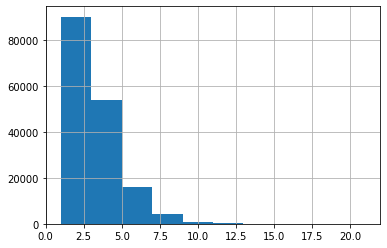

In [23]:
df.bathrooms.hist()

<AxesSubplot: >

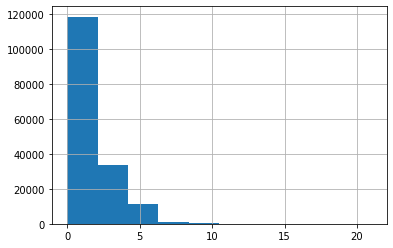

In [24]:
df.bedrooms.hist()

In [25]:
df.locations.value_counts()

Jumeirah Village Circle (JVC)    14231
Downtown Dubai                    9324
Bur Dubai                         9103
Dubai Marina                      8498
Business Bay                      7390
                                 ...  
Damac Lagoons                        5
Nad Shamma                           5
Deira Island                         3
The World Islands                    3
Palm Jebel Ali                       2
Name: locations, Length: 119, dtype: int64

In [26]:
df.property_types.value_counts()

Apartment               132097
Villa                    25882
Townhouse                 5158
Hotel Apartment           1459
Penthouse                  630
Residential Floor           43
Villa Compound              37
Residential Building        20
Name: property_types, dtype: int64

In [28]:
df.columns

Index(['bedrooms', 'bathrooms', 'area', 'prices', 'locations',
       'property_types', 'property_keywords', 'description', 'amenities'],
      dtype='object')

In [29]:
corr_matrix = df[['bedrooms','bathrooms','area','prices']].corr()
corr_matrix

,bedrooms,bathrooms,area,prices
bedrooms,1.000000,0.928082,0.641906,0.242565
bathrooms,0.928082,1.000000,0.650539,0.247618
area,0.641906,0.650539,1.000000,0.221170
prices,0.242565,0.247618,0.221170,1.000000


<AxesSubplot: >

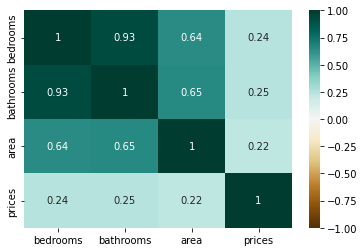

In [35]:
sns.heatmap(corr_matrix,vmin=-1, vmax=1, annot=True,cmap='BrBG')

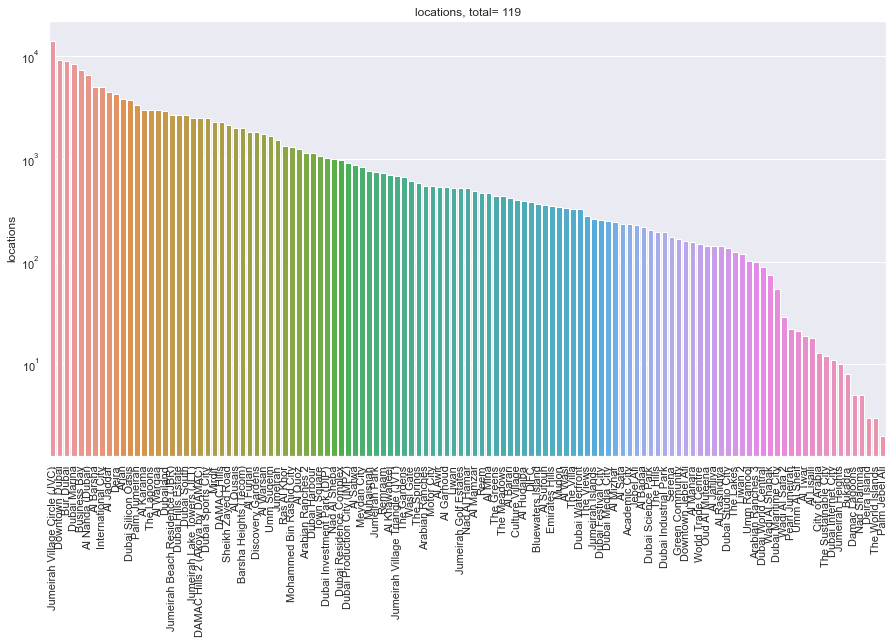

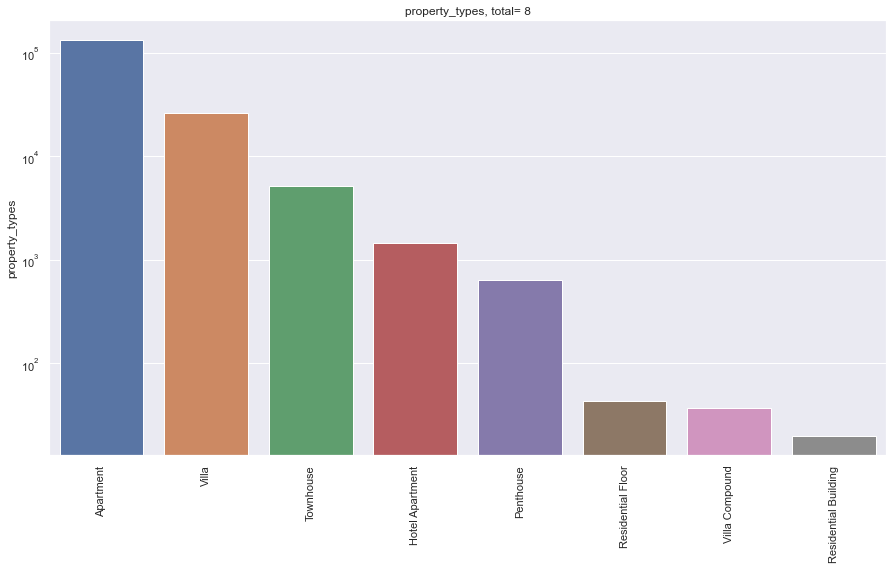

In [46]:
sns.set(rc = {'figure.figsize':(15,8)})
df_cat = df[['locations','property_types']]
for i in df_cat.columns:
    cat_num = df_cat[i].value_counts()
    chart = sns.barplot(x=cat_num.index,y=cat_num)
    chart.set_xticklabels(chart.get_xticklabels(),rotation=90)
    chart.set_yscale('log')
    chart.set(title=f"{i}, total= {len(cat_num)}")
    plt.show()

# Feature Engineering

### Pool

In [87]:
df['pool'] = df.apply(lambda x: 1 if 'pool' in x.description.lower() or 'pool' in x.amenities.lower() or 'pool' in x.property_keywords.lower() else 0  ,axis=1)

In [85]:
df.pool.value_counts()

1    126542
0     38784
dtype: int64

### Balcony

In [94]:
df['balcony'] = df.apply(lambda x: 1 
                         if 'balcony' in x.description.lower() or 'terrace' in x.description.lower()
                         or 'balcony' in x.amenities.lower()  or 'terrace' in x.amenities.lower()
                         or 'balcony' in x.property_keywords.lower() or 'terrace' in x.property_keywords.lower() 
                         else 0  ,axis=1)
df.balcony.value_counts()


1    127216
0     38110
Name: balcony, dtype: int64

### Furnished

In [96]:
df['furnished'] = df.apply(lambda x: 1 
                         if 'furnished' in x.description.lower() 
                         or 'furnished' in x.amenities.lower() 
                         or 'furnished' in x.property_keywords.lower() 
                         else 0  ,axis=1)
df.furnished.value_counts()


0    91757
1    73569
Name: furnished, dtype: int64

### Maid's room

In [97]:
df['maid'] = df.apply(lambda x: 1 
                         if 'maid' in x.description.lower() 
                         or 'maid' in x.amenities.lower() 
                         or 'maid' in x.property_keywords.lower() 
                         else 0  ,axis=1)
df.furnished.value_counts()


0    91757
1    73569
Name: furnished, dtype: int64

### Gym

In [111]:
df['gym'] = df.apply(lambda x: 1 
                         if 'gym' in x.description.lower() or 'fitness' in x.description.lower() or 'gymnasium' in x.description.lower() 
                         or 'gym' in x.amenities.lower() or 'fitness' in x.amenities.lower() or 'gymnasium' in x.amenities.lower() 
                         or 'gym' in x.property_keywords.lower() or 'fitness' in x.property_keywords.lower() or 'gymnasium' in x.property_keywords.lower() 
                         else 0  ,axis=1)
df.gym.value_counts()

1    124475
0     40851
Name: gym, dtype: int64

### Brand New

In [106]:
df['brand_new'] = df.apply(lambda x: 1 
                         if 'brand new' in x.description.lower()
                         or 'brand new' in x.amenities.lower() 
                         or 'brand new' in x.property_keywords.lower()
                         else 0  ,axis=1)
df.brand_new.value_counts()

0    123319
1     42007
Name: brand_new, dtype: int64

### Burj Khalifa View

In [144]:
df['burj_view'] = df.apply(lambda x: 1 
                         if ('burj khalifa' in x.description.lower() and 'view' in x.description.lower())
                         or ('burj khalifa' in x.amenities.lower()  and 'view' in x.amenities.lower())
                         or ('burj khalifa' in x.property_keywords.lower() and 'view' in x.property_keywords.lower())
                         else 0  ,axis=1)
df.burj_view.value_counts()

0    150322
1     15004
Name: burj_view, dtype: int64

### Sea View

In [146]:
df['sea_view'] = df.apply(lambda x: 1 
                         if 'sea view' in x.description.lower() 
                         or 'sea view' in x.amenities.lower()
                         or 'sea view' in x.property_keywords.lower()
                         else 0  ,axis=1)
df.sea_view.value_counts()

0    154140
1     11186
Name: sea_view, dtype: int64

### At beach or proximity to beach

In [149]:
df['beach'] = df.apply(lambda x: 1 
                         if 'beach'in x.description.lower()
                         or 'beach'  in x.amenities.lower() 
                         or 'beach'  in x.property_keywords.lower()
                         else 0  ,axis=1)
df.beach.value_counts()

0    148917
1     16409
Name: beach, dtype: int64

In [155]:
df.columns

Index(['bedrooms', 'bathrooms', 'area', 'prices', 'locations',
       'property_types', 'property_keywords', 'description', 'amenities',
       'pool', 'balcony', 'furnished', 'maid', 'gym', 'brand_new', 'burj_view',
       'sea_view', 'beach'],
      dtype='object')

In [161]:
df_final = df[['bedrooms', 'bathrooms', 'area', 'prices', 'locations',
               'property_types','pool', 'balcony', 'furnished', 'maid', 'gym', 'brand_new', 'burj_view',
               'sea_view', 'beach']]
df_final

,bedrooms,bathrooms,area,prices,locations,property_types,pool,balcony,furnished,maid,gym,brand_new,burj_view,sea_view,beach
0,1,2,883.0,77990.0,DAMAC Hills,Apartment,0,1,1,0,1,1,0,0,0
1,2,3,8425.0,200000.0,Jumeirah Village Circle (JVC),Villa,0,1,1,1,1,1,0,0,0
2,5,4,6002.0,600000.0,Jumeirah Golf Estates,Villa,0,1,1,0,1,1,0,0,0
3,2,2,1200.0,60000.0,Bur Dubai,Apartment,0,1,1,0,1,1,0,0,0
4,7,8,8000.0,950000.0,The Lakes,Villa,0,1,1,0,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38203,4,4,2387.0,265000.0,Dubai Hills Estate,Villa,1,1,1,0,1,0,1,0,0
38204,1,1,800.0,33000.0,Al Warqaa,Apartment,1,1,1,0,1,0,1,0,0
38205,4,5,7437.0,700000.0,Dubai Hills Estate,Villa,1,1,1,0,1,1,1,0,0
38206,1,1,450.0,28000.0,Deira,Apartment,1,1,1,0,1,0,1,0,0


In [162]:
df_final.to_csv('properties_cleaned_engineered.csv',index=False)